In [1]:
push!(LOAD_PATH, pwd() * "/my_module")
ENV["GKS_ENCODING"]="utf8"

"utf8"

In [2]:
using Revise
using Plots
using linear_prog_prob: simplex

gr(fontfamily="IPAMincho")

Plots.GRBackend()

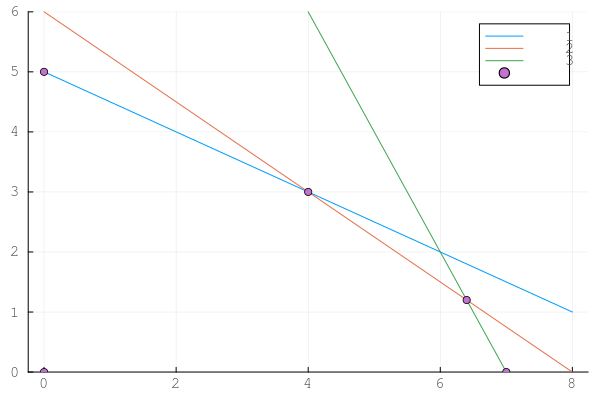

GKS: could not find font IPAMincho.ttf
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font: 32004
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 21046
GKS: glyph missing from current font:

In [3]:
x_data = 0:1:8
plt = plot()
plot!(plt, x_data, 5  .- x_data ./ 2,            label="制約条件1", ylim=(0,6))
plot!(plt, x_data, 6  .- x_data .* (3 / 4),      label="制約条件2", ylim=(0,6))
plot!(plt, x_data, 14 .- x_data .* 2,            label="制約条件3", ylim=(0,6))
plot!(plt, [0, 0, 4, 6.4, 7], [0, 5, 3, 1.2, 0], label="解の候補",  st=:scatter)

In [11]:
object       = [5 8 0 0 0]
conditions_A = [1 2 1 0 0; 3 4 0 1 0; 2 1 0 0 1]
conditions_b = [10, 24, 14]

simplex(object, conditions_A, conditions_b)

object =

1×5 Matrix{Int64}:
 5  8  0  0  0

conditions_A =

3×5 Matrix{Int64}:
 1  2  1  0  0
 3  4  0  1  0
 2  1  0  0  1

conditions_b =

3-element Vector{Int64}:
 10
 24
 14

3-element Vector{Int64}:
 10
 24
 14